In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [65]:
#accsessing the data and creating the dataframe for qb stats for the model
pbp_data = nfl.import_pbp_data([2020, 2021, 2022, 2023, 2024])

# Filter for pass plays by QBs
qb_plays = pbp_data[
    (pbp_data['play_type'] == 'pass') & 
    (pbp_data['season_type'] == 'REG') & 
    (pbp_data['passer_player_name'].notna())
].copy()

# Aggregate stats
qb_stats = qb_plays.groupby(['season', 'passer_player_id', 'passer_player_name']).agg({
    'complete_pass': 'sum',
    'interception': 'sum',
    'sack': 'sum',
    'yards_gained': 'sum',
    'pass_touchdown': 'sum',
    'play_type': 'count'
}).rename(columns={
    'play_type': 'attempts',
    'pass_touchdown': 'passing_tds',
    'passer_player_name': 'player_name'
}).reset_index()

# Same calculations as above
qb_stats['comp_pct'] = round(qb_stats['complete_pass'] / qb_stats['attempts'] * 100, 1)
qb_stats['ypa'] = round(qb_stats['yards_gained'] / qb_stats['attempts'], 1)
qb_stats['td_int_ratio'] = round(qb_stats['passing_tds'] / (qb_stats['interception'] + 1), 2)
qb_stats['td_rate'] = round(qb_stats['passing_tds'] / qb_stats['attempts'], 3)
qb_stats['int_rate'] = round(qb_stats['interception'] / qb_stats['attempts'], 3)

print(qb_stats.sort_values('yards_gained', ascending=False).head(10))

2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
     season passer_player_id passer_player_name  complete_pass  interception  \
121    2021       00-0019596            T.Brady          485.0          12.0   
296    2022       00-0033873          P.Mahomes          435.0          12.0   
232    2021       00-0036355          J.Herbert          443.0          15.0   
188    2021       00-0033873          P.Mahomes          436.0          13.0   
133    2021       00-0026498         M.Stafford          404.0          17.0   
544    2024       00-0036442           J.Burrow          460.0           9.0   
73     2020       00-0033873          P.Mahomes          390.0           6.0   
157    2021       00-0031280             D.Carr          428.0          14.0   
245    2022       00-0019596            T.Brady          490.0           9.0   
334    2022       00-0036355          J.Herbert          477.0          10.0   

     sack  yards_gained  passing_tds  attemp

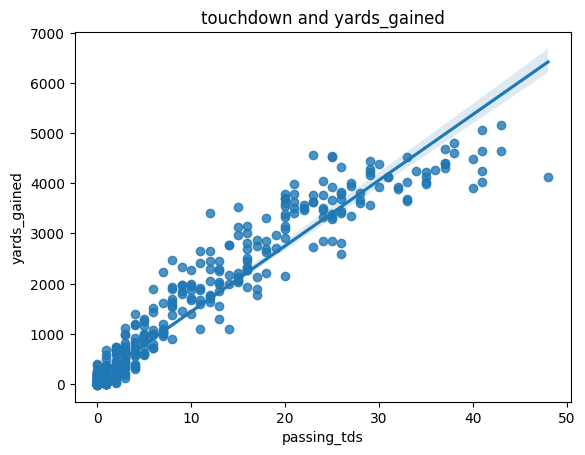

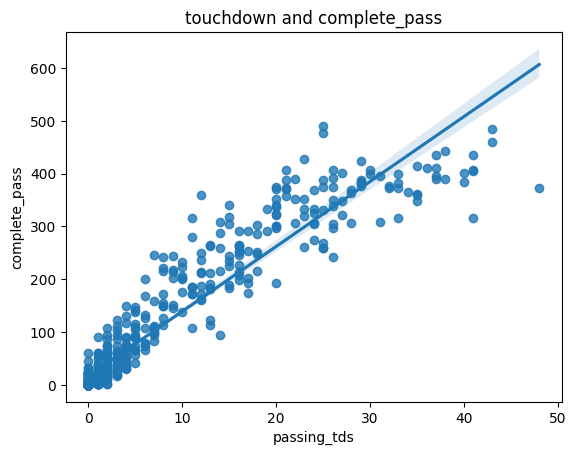

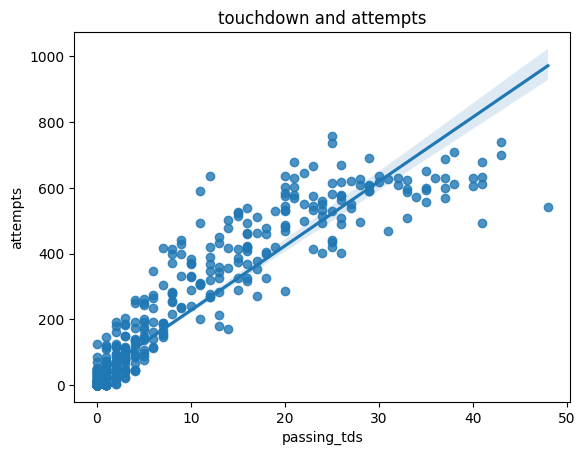

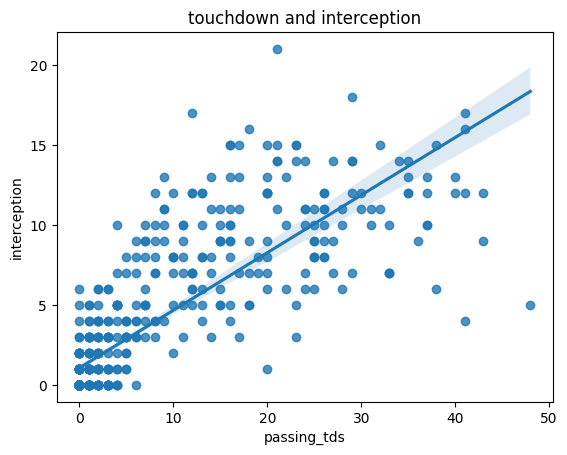

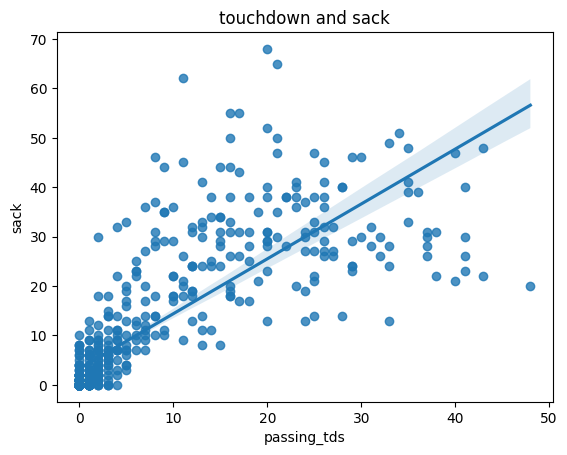

In [66]:
# Plotting the data and seeing the correlation between qb stats and touchdowns thrown
for y in ['yards_gained', 'complete_pass', 'attempts', 'interception', 'sack']:
    sns.regplot(data=qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

In [67]:
#copying the data to create a new column for a predictive model
# This is a simple regression model to predict future performance based on past performance
copy = qb_stats.copy()
copy['season'] = copy['season'].add(1)

new_qb_stats = (qb_stats.merge(copy, on = ['season',
 'passer_player_id', 'passer_player_name'], suffixes=('', '_prev'), how='left'))
new_qb_stats.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
238,2021,00-0036929,I.Book,12.0,2.0,8.0,81.0,0.0,28,42.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,2022,00-0026158,J.Flacco,110.0,3.0,10.0,985.0,5.0,201,54.7,...,0.0,2.0,325.0,3.0,44.0,61.4,7.4,3.00,0.068,0.000
365,2023,00-0027973,A.Dalton,34.0,0.0,3.0,334.0,2.0,61,55.7,...,9.0,25.0,2684.0,18.0,404.0,62.4,6.6,1.80,0.045,0.022
217,2021,00-0035689,D.Knox,0.0,0.0,0.0,2.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2020,00-0036312,J.Luton,60.0,6.0,7.0,572.0,2.0,118,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,2024,00-0034960,J.Meyers,0.0,0.0,1.0,-10.0,0.0,1,0.0,...,0.0,0.0,12.0,1.0,3.0,66.7,4.0,1.00,0.333,0.000
262,2022,00-0029604,K.Cousins,424.0,14.0,46.0,4224.0,29.0,690,61.4,...,7.0,28.0,4024.0,33.0,587.0,63.4,6.9,4.12,0.056,0.012
82,2020,00-0034577,K.Allen,60.0,1.0,7.0,566.0,4.0,96,62.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,2022,00-0036358,C.Lamb,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2020,00-0036320,J.Charlton,1.0,0.0,1.0,23.0,0.0,2,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


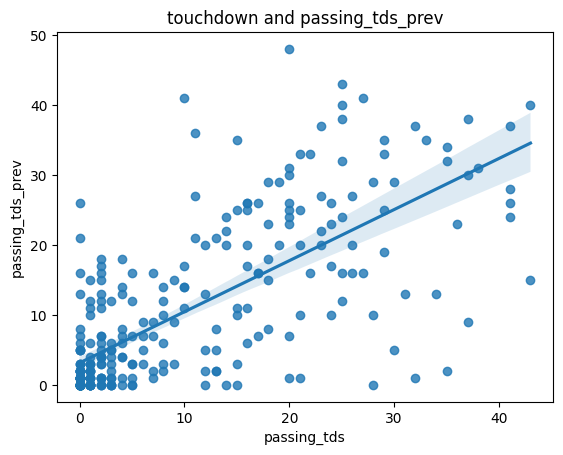

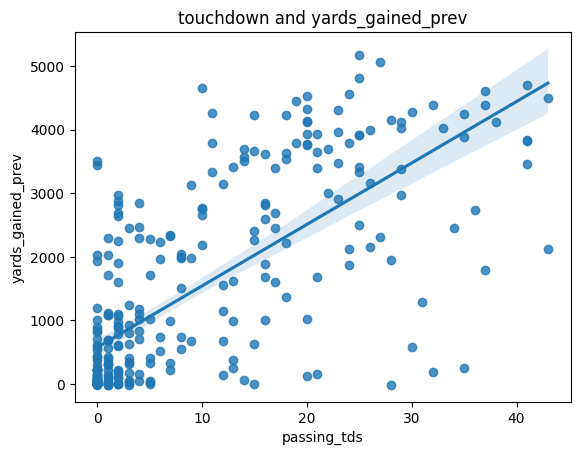

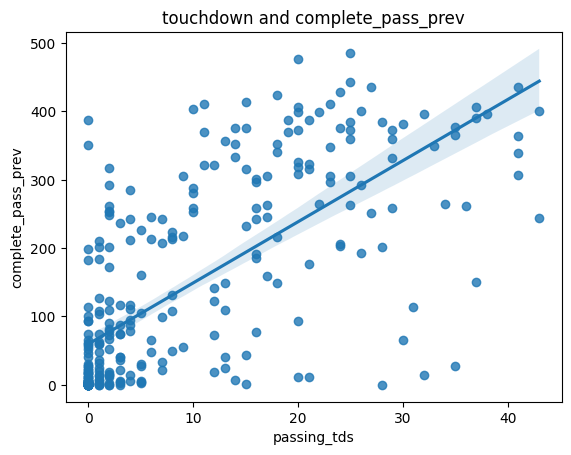

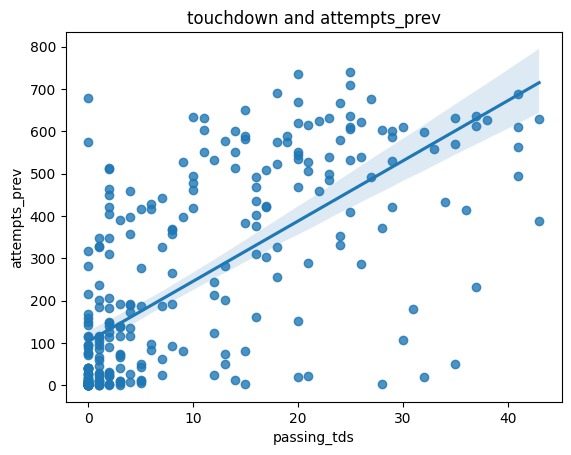

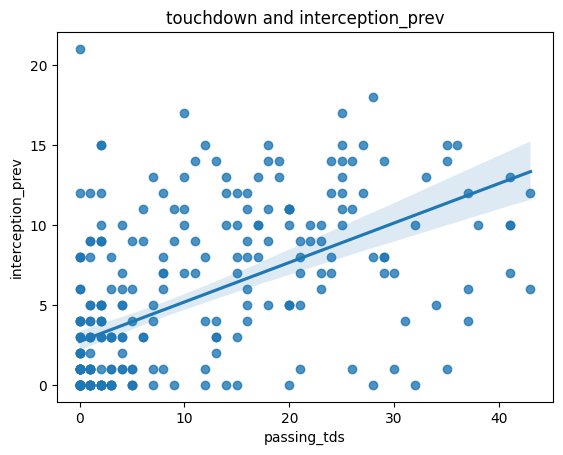

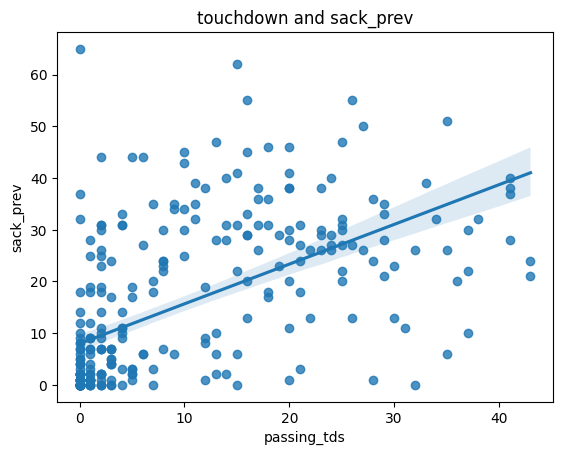

In [68]:
#plotting the data and seeing the correlation between previous qb stats and touchdowns thrown in the current season
for y in ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'attempts_prev', 'interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

# using the model to Predict 2022 Touchdowns

In [69]:
#loading in the machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#training the model
features = ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'td_rate_prev',
             'interception_prev', 'int_rate_prev', 'ypa_prev', 'sack_prev', 'comp_pct_prev']
target = 'passing_tds'

# Creating a subset with no null values (especially for _prev columns)
model_data = new_qb_stats.dropna(subset=features + [target]).copy() # Use .copy() for better code practice

# Filter out players with too few previous attempts
min_prev_attempts = 1
qb_stats_filtered = new_qb_stats[new_qb_stats['attempts_prev'] >= min_prev_attempts]

# Then, use qb_stats_filtered to create model_data
model_data = qb_stats_filtered.dropna(subset=features + [target]).copy()

#train on 2021 data
train_data = (model_data.loc[model_data['season'] < 2022])

#test on 2022 data
test_data = (model_data.loc[model_data['season']==2022])

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 6.904484417833103
r2: 0.6134648270502397


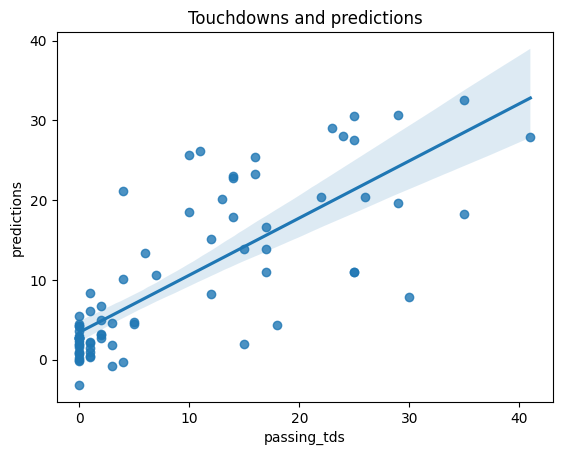

In [70]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [ ]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_id', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_id,passer_player_name,passing_tds,predictions
296,2022,00-0033873,P.Mahomes,41.0,27.934339
338,2022,00-0036442,J.Burrow,35.0,32.590382
310,2022,00-0034857,J.Allen,35.0,18.248467
265,2022,00-0030565,G.Smith,30.0,7.829233
262,2022,00-0029604,K.Cousins,29.0,30.646245
284,2022,00-0033106,J.Goff,29.0,19.666267
247,2022,00-0023459,A.Rodgers,26.0,20.357485
245,2022,00-0019596,T.Brady,25.0,30.565355
345,2022,00-0036971,T.Lawrence,25.0,11.008852
334,2022,00-0036355,J.Herbert,25.0,27.576734


# aggregating career totals to increase the accuracy of the model

In [72]:
# Sort by player and season to ensure correct cumulative calculation
qb_stats_sorted = qb_stats.sort_values(['passer_player_id', 'season'])

# Define the raw stats columns for which we want to calculate cumulative previous season totals
raw_stats_to_accumulate = [
    'complete_pass', 'interception', 'sack',
    'yards_gained', 'passing_tds', 'attempts'
]

# Create a new DataFrame based on the sorted qb_stats
new_qb_stats_career_prev = qb_stats_sorted.copy()

# --- Calculate cumulative sums of raw stats for all PREVIOUS seasons ---
# Group by player, calculate cumulative sum, then shift by 1 to get the sum of all prior seasons
for col in raw_stats_to_accumulate:
    cumulative_col_name = f'{col}_career_cumulative'
    # Calculate cumulative sum up to and including the current season
    new_qb_stats_career_prev[cumulative_col_name] = new_qb_stats_career_prev.groupby('passer_player_id')[col].cumsum()
    # Shift to get the sum of all seasons *before* the current one
    new_qb_stats_career_prev[f'{col}_prev'] = new_qb_stats_career_prev.groupby('passer_player_id')[cumulative_col_name].shift(1)
    # Drop the intermediate cumulative column
    new_qb_stats_career_prev.drop(columns=[cumulative_col_name], inplace=True)


# --- Calculate derived _prev stats based on the aggregated _prev raw stats ---
# For a player's first season, these _prev stats will be NaN, which is appropriate.

# comp_pct_prev
new_qb_stats_career_prev['comp_pct_prev'] = round(
    new_qb_stats_career_prev['complete_pass_prev'] / new_qb_stats_career_prev['attempts_prev'] * 100, 1
)

# ypa_prev
new_qb_stats_career_prev['ypa_prev'] = round(
    new_qb_stats_career_prev['yards_gained_prev'] / new_qb_stats_career_prev['attempts_prev'], 1
)

# td_int_ratio_prev (adding 1 to interception_prev in denominator to match original logic)
new_qb_stats_career_prev['td_int_ratio_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / (new_qb_stats_career_prev['interception_prev'] + 1), 2
)

# td_rate_prev
new_qb_stats_career_prev['td_rate_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# int_rate_prev
new_qb_stats_career_prev['int_rate_prev'] = round(
    new_qb_stats_career_prev['interception_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# Display a sample of the new DataFrame
# The columns for _prev stats will be NaN for the first season of each player
new_qb_stats_career_prev.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
47,2020,00-0031382,J.Landry,4.0,0.0,0.0,74.0,1.0,4,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,2024,00-0034577,K.Allen,1.0,0.0,0.0,19.0,0.0,1,100.0,...,5.0,14.0,1056.0,7.0,203.0,58.1,5.2,1.17,0.034,0.025
585,2024,00-0039916,R.Pearsall,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2023,00-0038102,K.Pickett,201.0,4.0,23.0,1897.0,6.0,347,57.9,...,9.0,27.0,2226.0,7.0,417.0,58.8,5.3,0.70,0.017,0.022
582,2024,00-0039851,D.Maye,225.0,10.0,34.0,2051.0,15.0,374,60.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,2023,00-0030279,K.Allen,1.0,0.0,0.0,49.0,1.0,2,50.0,...,0.0,0.0,2.0,0.0,3.0,0.0,0.7,0.00,0.000,0.000
22,2020,00-0027948,B.Gabbert,9.0,0.0,1.0,136.0,2.0,17,52.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2021,00-0029263,R.Wilson,259.0,6.0,33.0,2849.0,25.0,435,59.5,...,13.0,47.0,3913.0,40.0,606.0,63.4,6.5,2.86,0.066,0.021
435,2023,00-0036355,J.Herbert,297.0,7.0,29.0,2903.0,20.0,486,61.1,...,35.0,101.0,13467.0,94.0,2071.0,63.5,6.5,2.61,0.045,0.017
227,2021,00-0036212,T.Tagovailoa,263.0,10.0,20.0,2503.0,16.0,409,64.3,...,5.0,20.0,1680.0,11.0,310.0,60.0,5.4,1.83,0.035,0.016


# Using the model to predict 2024 Touchdowns

In [76]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] < 2024].copy()

# Test on 2024 data
test_data = model_data[model_data['season'] == 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.676478888099107
r2: 0.5507554893451884


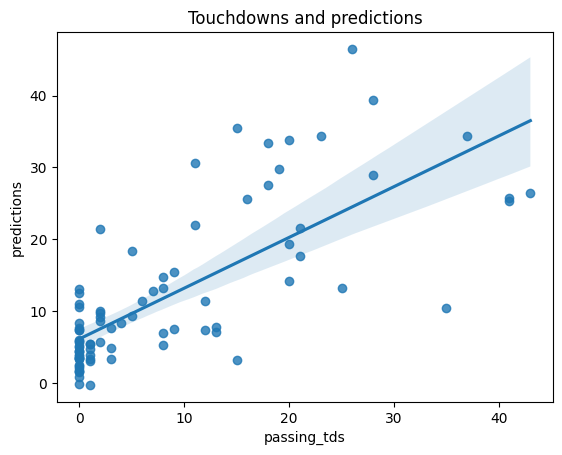

In [77]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [ ]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
544,2024,J.Burrow,43.0,26.399491
525,2024,B.Mayfield,41.0,25.718376
522,2024,L.Jackson,41.0,25.292201
503,2024,J.Goff,37.0,34.341773
527,2024,S.Darnold,35.0,10.408467
478,2024,A.Rodgers,28.0,28.946513
526,2024,J.Allen,28.0,39.348572
511,2024,P.Mahomes,26.0,46.505267
539,2024,J.Love,25.0,13.202008
542,2024,J.Herbert,23.0,34.333411


# Predicting 2025 Touchdowns

In [81]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] <= 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

# Plotting the top 10 predictions vs actual touchdowns
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values('predictions', ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
511,2024,P.Mahomes,26.0,39.481053
526,2024,J.Allen,28.0,30.958245
486,2024,K.Cousins,18.0,30.423062
542,2024,J.Herbert,23.0,30.407018
490,2024,D.Carr,15.0,29.862636
503,2024,J.Goff,37.0,29.296990
481,2024,M.Stafford,20.0,28.580825
478,2024,A.Rodgers,28.0,28.207079
485,2024,R.Wilson,16.0,26.688753
502,2024,D.Prescott,11.0,26.339491


# Note this data frame does not show the accuracy of the model but instead shows 2025 predictions